# Data pre-processing and correlation analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import standardised_pipeline_utils
#The joblib library is used for efficient saving and loading of Python objects.

# Save / dump models or data to/from a file
from joblib import dump, load

#### Datasets Used:
 
CCLE genes expressions:
Proteomics:

In [2]:
transcriptomics = pd.read_csv('https://figshare.com/ndownloader/files/25797014')
# contains expression values for around 52k genes
# non-full version includes 19k protein-coding genes
# both are log_2(x+1) transformed
transcriptomics.head()

,Unnamed: 0,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),...,ERCC-00157,ERCC-00158,ERCC-00160,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171
0,ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,...,0.000000,0.000000,0.150560,2.599318,0.887525,0.000000,0.650765,0.042644,0.344828,7.053872
1,ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,...,0.286881,0.028569,0.505891,3.744161,1.669027,0.000000,1.454176,0.056584,0.757023,8.763445
3,ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,...,0.201634,0.070389,0.516015,3.941106,1.807355,0.028569,1.560715,0.070389,0.941106,9.021757
4,ACH-000242,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
proteomics = pd.read_excel('https://gygi.hms.harvard.edu/data/ccle/Table_S2_Protein_Quant_Normalized.xlsx', sheet_name=1)
# this is the normalized protein abundance data
# there is a non-normalized version
# the normalization is good
# this is what upadhya uses
proteomics.head()

,Protein_Id,Gene_Symbol,Description,Group_ID,Uniprot,Uniprot_Acc,TenPx01_Peptides,TenPx02_Peptides,TenPx03_Peptides,TenPx04_Peptides,...,Column15949,Column15950,Column15951,Column15952,Column15953,Column15954,Column15955,Column15956,Column15957,Column15958
0,sp|P55011|S12A2_HUMAN,SLC12A2,S12A2_HUMAN Solute carrier family 12 member 2,0,S12A2_HUMAN,P55011,41,16,23,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sp|P35453|HXD13_HUMAN,HOXD13,HXD13_HUMAN Homeobox protein Hox-D13,1,HXD13_HUMAN,P35453,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sp|O60341|KDM1A_HUMAN,KDM1A,KDM1A_HUMAN Lysine-specific histone demethylas...,2,KDM1A_HUMAN,O60341,25,35,37,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sp|O00570|SOX1_HUMAN,SOX1,SOX1_HUMAN Transcription factor SOX-1,4,SOX1_HUMAN,O00570,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sp|P48431|SOX2_HUMAN,SOX2,SOX2_HUMAN Transcription factor SOX-2,4,SOX2_HUMAN,P48431,1,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sample_info = pd.read_csv('data/sample_info.csv')

### Transcriptomics: Upadhya processing and saving

In [5]:
transcriptomics = transcriptomics.set_index('Unnamed: 0')
transcriptomics = transcriptomics.rename(index = dict(zip(sample_info['DepMap_ID'],
                                                          sample_info['CCLE_Name'])),
                                        columns = lambda x : str(x).split(' ')[0])
# changed cell line names
transcriptomics.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00157,ERCC-00158,ERCC-00160,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
LC1SQSF_LUNG,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,5.053980,...,0.000000,0.000000,0.150560,2.599318,0.887525,0.000000,0.650765,0.042644,0.344828,7.053872
COGAR359_SOFT_TISSUE,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,3.832890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
COLO794_SKIN,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,3.775051,...,0.286881,0.028569,0.505891,3.744161,1.669027,0.000000,1.454176,0.056584,0.757023,8.763445
KKU213_BILIARY_TRACT,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,4.294253,...,0.201634,0.070389,0.516015,3.941106,1.807355,0.028569,1.560715,0.070389,0.941106,9.021757
RT4_URINARY_TRACT,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,4.710944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
transcriptomics = transcriptomics.transpose()
assert len(transcriptomics.columns[transcriptomics.columns.duplicated()]) == 0, "columns contain duplicates"

In [7]:
transcriptomics_processed = standardised_pipeline_utils.process(transcriptomics)
# drop rows (genes) with more than 20% NaNs (only removed 2 genes)
# rows with same index are collapsed together into one row with avg values
# drop rows that are indexed by datetime object
# drop rows containing ":"

Dimensions:  (51989, 1376)


In [8]:
transcriptomics_processed = transcriptomics_processed.transpose()

In [9]:
transcriptomics_processed.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
LC1SQSF_LUNG,3.976364,3.272023,0.014355,0.000000,0.584963,0.799087,0.0,0.0,0.000000,0.0,...,6.548282,1.084064,1.859970,3.820690,2.526069,0.000000,3.351911,4.798051,4.041769,5.368419
COGAR359_SOFT_TISSUE,2.134221,2.266037,0.000000,0.799087,1.339137,0.111031,0.0,0.0,0.000000,0.0,...,6.561021,1.510962,2.565597,3.554589,1.875780,0.000000,3.395063,5.420550,2.939227,4.325530
COLO794_SKIN,2.650765,2.090853,0.000000,5.700440,0.536053,0.000000,0.0,0.0,0.028569,0.0,...,6.540244,0.250962,1.238787,3.408712,0.111031,0.042644,2.622930,5.842225,2.790772,4.812498
KKU213_BILIARY_TRACT,0.000000,0.000000,0.000000,0.070389,0.150560,0.042644,0.0,0.0,0.000000,0.0,...,5.462380,1.469886,2.615887,3.319040,0.028569,0.000000,2.283922,6.190615,2.084064,4.898208
RT4_URINARY_TRACT,0.111031,0.189034,0.028569,0.163499,0.356144,0.176323,0.0,0.0,0.400538,0.0,...,7.083213,1.035624,2.266037,3.888500,0.124328,0.000000,2.941106,5.359310,3.711495,4.416164


In [10]:
dump(transcriptomics_processed, "data/transcriptomics.joblib")

['data/transcriptomics.joblib']

### Proteomics: Upadhya processing and saving

In [11]:
proteomics.set_index('Gene_Symbol', inplace=True)

In [12]:
proteomics = proteomics.loc[:, proteomics.columns.str.contains('_TenPx')]

In [13]:
# Checking for cell lines repeated in >1 Ten-plexes
proteomics.filter(regex='SW948_LARGE_INTESTINE|CAL120_BREAST|HCT15_LARGE_INTESTINE').columns

Index(['CAL120_BREAST_TenPx02', 'SW948_LARGE_INTESTINE_TenPx11',
       'SW948_LARGE_INTESTINE_TenPx20', 'CAL120_BREAST_TenPx28',
       'HCT15_LARGE_INTESTINE_TenPx30', 'HCT15_LARGE_INTESTINE_TenPx18'],
      dtype='object')

In [14]:
# Eliminating the cell lines that do not correlate well with transcriptomics data as mentioned in the paper 
proteomics.drop(columns=['SW948_LARGE_INTESTINE_TenPx11', 'CAL120_BREAST_TenPx02', 'HCT15_LARGE_INTESTINE_TenPx30'], 
                    inplace=True)
proteomics = proteomics.rename(columns = lambda x : str(x).split('_TenPx')[0])

In [15]:
assert len(proteomics.columns[proteomics.columns.duplicated()]) == 0, "columns contain duplicates"

In [16]:
proteomics_processed = standardised_pipeline_utils.process(proteomics)
# drop rows (proteins) with more than 20% NaNs (removed 12755-7372=5383 proteins)
# rows with same index are collapsed together into one row with avg values
# drop rows that are indexed by datetime object
# drop rows containing ":"
proteomics_processed.head()

Dimensions:  (7372, 375)


,MDAMB468_BREAST,SH4_SKIN,AU565_BREAST,KMRC1_KIDNEY,CAL51_BREAST,RPMI7951_SKIN,RERFLCMS_LUNG,IGR37_SKIN,VMRCRCW_KIDNEY,HEP3B217_LIVER,...,NCIH2030_LUNG,22RV1_PROSTATE,A172_CENTRAL_NERVOUS_SYSTEM,BT20_BREAST,CALU6_LUNG,FADU_UPPER_AERODIGESTIVE_TRACT,KP4_PANCREAS,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OVCAR8_OVARY,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
A2M,-0.345562,1.642186,-1.129114,1.493333,0.274652,-0.615667,-0.957249,-0.174494,-0.987932,1.513325,...,-0.981657,-0.921538,3.905544,-0.649348,-1.055916,-1.116991,1.922976,-1.106344,-0.770372,-1.342713
AAAS,-0.109405,-0.283335,0.024663,-0.588886,0.673324,0.010466,0.474615,0.037159,-0.362833,-0.225824,...,-0.093176,-0.518686,-0.642067,-0.188224,-0.259101,-0.779655,-0.628770,1.205109,-0.584588,1.622359
AACS,0.370945,0.162102,1.071283,0.404605,-0.587890,0.025699,-0.767258,-0.598630,0.219004,-0.319453,...,-0.887698,-0.488146,0.356932,0.936065,-0.876305,-0.343373,-1.200965,0.660346,-0.442688,0.662618
AAGAB,0.009639,-0.057517,-0.758048,-0.210457,-0.044001,0.381038,0.093162,0.303576,0.319783,-0.023510,...,0.756894,-1.125006,0.195036,1.314434,-0.362100,0.032533,2.101721,-0.539838,0.256127,-0.745283
AAK1,0.005800,0.760639,-0.320451,0.533949,-0.778679,0.333378,-0.111288,-0.267637,0.289226,-0.408265,...,0.154595,-0.627264,0.595116,1.415555,-0.291160,-1.433436,-0.549493,0.951283,-0.329806,0.751036


In [17]:
proteomics_processed = proteomics_processed.transpose()

In [18]:
dump(proteomics_processed, "data/proteomics.joblib")

['data/proteomics.joblib']

### Matching cell lines

In [19]:
transcriptomics = load('data/transcriptomics.joblib')

In [20]:
transcriptomics

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
LC1SQSF_LUNG,3.976364,3.272023,0.014355,0.000000,0.584963,0.799087,0.0,0.0,0.000000,0.000000,...,6.548282,1.084064,1.859970,3.820690,2.526069,0.000000,3.351911,4.798051,4.041769,5.368419
COGAR359_SOFT_TISSUE,2.134221,2.266037,0.000000,0.799087,1.339137,0.111031,0.0,0.0,0.000000,0.000000,...,6.561021,1.510962,2.565597,3.554589,1.875780,0.000000,3.395063,5.420550,2.939227,4.325530
COLO794_SKIN,2.650765,2.090853,0.000000,5.700440,0.536053,0.000000,0.0,0.0,0.028569,0.000000,...,6.540244,0.250962,1.238787,3.408712,0.111031,0.042644,2.622930,5.842225,2.790772,4.812498
KKU213_BILIARY_TRACT,0.000000,0.000000,0.000000,0.070389,0.150560,0.042644,0.0,0.0,0.000000,0.000000,...,5.462380,1.469886,2.615887,3.319040,0.028569,0.000000,2.283922,6.190615,2.084064,4.898208
RT4_URINARY_TRACT,0.111031,0.189034,0.028569,0.163499,0.356144,0.176323,0.0,0.0,0.400538,0.000000,...,7.083213,1.035624,2.266037,3.888500,0.124328,0.000000,2.941106,5.359310,3.711495,4.416164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,4.874797,3.075533,0.014355,0.176323,0.000000,0.042644,0.0,0.0,0.000000,0.000000,...,7.813845,0.871844,2.361768,4.168321,2.301588,0.000000,3.226509,1.895303,3.887525,4.640390
SSP25_BILIARY_TRACT,0.189034,0.275007,0.056584,0.097611,0.545968,0.000000,0.0,0.0,0.000000,0.000000,...,5.773469,0.956057,2.367371,2.887525,0.815575,0.000000,2.990955,7.229396,3.452859,5.200457
ECC2_BILIARY_TRACT,0.000000,0.014355,0.000000,0.000000,0.526069,0.250962,0.0,0.0,0.014355,0.000000,...,5.490570,0.992768,1.835924,2.924100,0.070389,0.000000,2.144046,6.165108,3.389567,4.623516


In [21]:
proteomics = load('data/proteomics.joblib')

In [22]:
matched_cell_lines = [line for line in proteomics.index if line in transcriptomics.index]
len(matched_cell_lines)

369

In [23]:
transcriptomics_matched = transcriptomics.reindex(matched_cell_lines)
proteomics_matched = proteomics.reindex(matched_cell_lines)
# only keeping the 369 cell lines present both in transcriptomics and proteomics data

In [24]:
dump(transcriptomics_matched, "data/transcriptomics_matched.joblib")
dump(proteomics_matched, "data/proteomics_matched.joblib")

['data/proteomics_matched.joblib']

### Correlations

In [25]:
transcriptomics = load('data/transcriptomics_matched.joblib')
proteomics = load('data/proteomics_matched.joblib')

In [26]:
transcriptomics_corr, proteomics_corr = standardised_pipeline_utils.match_proteins_samples(transcriptomics.T,
                                                                                           proteomics.T)

Number of common proteins:  6998
Number of common samples:  369


#### Pearson 

In [27]:
pearson_correlations = transcriptomics_corr.corrwith(proteomics_corr,
                                                      axis=1,
                                                      method='pearson')

In [28]:
pearson_correlations.describe()

count    6998.000000
mean        0.470284
std         0.216143
min        -0.194505
25%         0.318028
50%         0.477247
75%         0.639718
max         0.910633
dtype: float64

#### Spearman

In [29]:
spearman_correlations = transcriptomics_corr.corrwith(proteomics_corr,
                                                      axis=1,
                                                      method='spearman')

In [30]:
spearman_correlations.describe()

count    6998.000000
mean        0.450719
std         0.210857
min        -0.174614
25%         0.303140
50%         0.456450
75%         0.607116
max         0.894819
dtype: float64

#### Kendall

In [31]:
kendall_correlations = transcriptomics_corr.corrwith(proteomics_corr,
                                                      axis=1,
                                                      method='kendall')

In [32]:
kendall_correlations.describe()

count    6998.000000
mean        0.320721
std         0.159228
min        -0.115394
25%         0.206878
50%         0.317161
75%         0.434045
max         0.706390
dtype: float64

In [33]:
correlations = pd.DataFrame({'pearson': pearson_correlations,
                             'spearman': spearman_correlations,
                             'kendall': kendall_correlations})

In [34]:
dump(correlations, 'data/correlations.joblib')

['data/correlations.joblib']

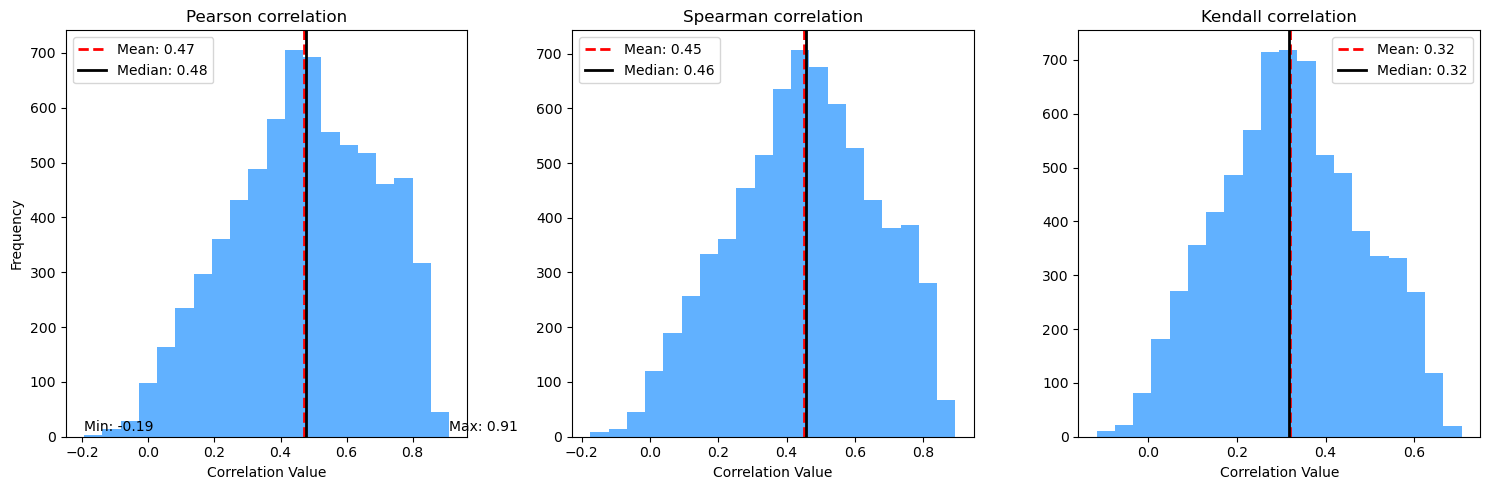

In [36]:
corr1 = pearson_correlations
corr2 = spearman_correlations
corr3 = kendall_correlations

mean_corr1, median_corr1 = np.mean(corr1), np.median(corr1)
mean_corr2, median_corr2 = np.mean(corr2), np.median(corr2)
mean_corr3, median_corr3 = np.mean(corr3), np.median(corr3)

min_corr1, max_corr1 = np.min(corr1), np.max(corr1)
min_corr2, max_corr2 = np.min(corr2), np.max(corr2)
min_corr3, max_corr3 = np.min(corr3), np.max(corr3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# pearson
axes[0].hist(corr1, bins=20, color='dodgerblue', alpha=0.7)
axes[0].axvline(mean_corr1, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_corr1:.2f}')
axes[0].axvline(median_corr1, color='black', linestyle='solid', linewidth=2, label=f'Median: {median_corr1:.2f}')
axes[0].set_title('Pearson correlation')
axes[0].set_xlabel('Correlation Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
# spearman
axes[1].hist(corr2, bins=20, color='dodgerblue', alpha=0.7)
axes[1].axvline(mean_corr2, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_corr2:.2f}')
axes[1].axvline(median_corr2, color='black', linestyle='solid', linewidth=2, label=f'Median: {median_corr2:.2f}')
axes[1].set_title('Spearman correlation')
axes[1].set_xlabel('Correlation Value')
axes[1].legend()

# kendall
axes[2].hist(corr3, bins=20, color='dodgerblue', alpha=0.7)
axes[2].axvline(mean_corr3, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_corr3:.2f}')
axes[2].axvline(median_corr3, color='black', linestyle='solid', linewidth=2, label=f'Median: {median_corr3:.2f}')
axes[2].set_title('Kendall correlation')
axes[2].set_xlabel('Correlation Value')
axes[2].legend()

plt.tight_layout()
plt.show()

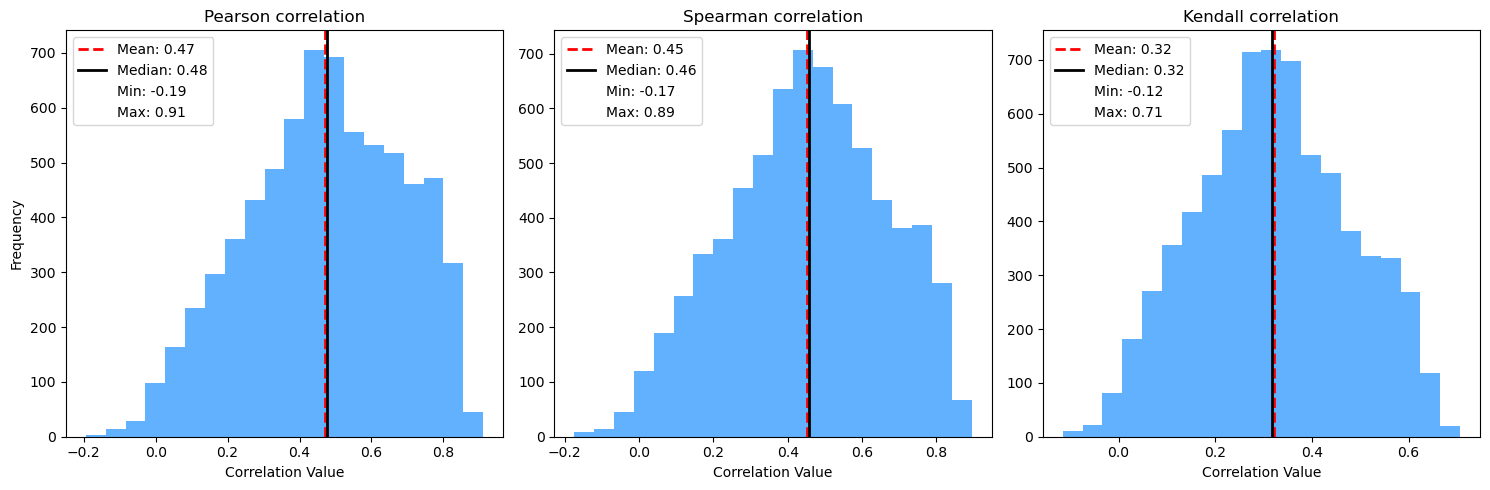

In [37]:
corr1 = pearson_correlations
corr2 = spearman_correlations
corr3 = kendall_correlations

# Calculate mean, median, min, and max for each measure
mean_corr1, median_corr1 = np.mean(corr1), np.median(corr1)
mean_corr2, median_corr2 = np.mean(corr2), np.median(corr2)
mean_corr3, median_corr3 = np.mean(corr3), np.median(corr3)

min_corr1, max_corr1 = np.min(corr1), np.max(corr1)
min_corr2, max_corr2 = np.min(corr2), np.max(corr2)
min_corr3, max_corr3 = np.min(corr3), np.max(corr3)

# Set up a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Correlation 1
axes[0].hist(corr1, bins=20, color='dodgerblue', alpha=0.7)
axes[0].axvline(mean_corr1, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_corr1:.2f}')
axes[0].axvline(median_corr1, color='black', linestyle='solid', linewidth=2, label=f'Median: {median_corr1:.2f}')
axes[0].axvline(min_corr1, color='purple', linestyle='dotted', linewidth=2, label=f'Min: {min_corr1:.2f}', alpha=0)
axes[0].axvline(max_corr1, color='orange', linestyle='dotted', linewidth=2, label=f'Max: {max_corr1:.2f}', alpha=0)
axes[0].set_title('Pearson correlation')
axes[0].set_xlabel('Correlation Value')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper left')

# Plot for Correlation 2
axes[1].hist(corr2, bins=20, color='dodgerblue', alpha=0.7)
axes[1].axvline(mean_corr2, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_corr2:.2f}')
axes[1].axvline(median_corr2, color='black', linestyle='solid', linewidth=2, label=f'Median: {median_corr2:.2f}')
axes[1].axvline(min_corr2, color='purple', linestyle='dotted', linewidth=2, label=f'Min: {min_corr2:.2f}', alpha=0)
axes[1].axvline(max_corr2, color='orange', linestyle='dotted', linewidth=2, label=f'Max: {max_corr2:.2f}', alpha=0)
axes[1].set_title('Spearman correlation')
axes[1].set_xlabel('Correlation Value')
axes[1].legend(loc='upper left')

# Plot for Correlation 3
axes[2].hist(corr3, bins=20, color='dodgerblue', alpha=0.7)
axes[2].axvline(mean_corr3, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_corr3:.2f}')
axes[2].axvline(median_corr3, color='black', linestyle='solid', linewidth=2, label=f'Median: {median_corr3:.2f}')
axes[2].axvline(min_corr3, color='purple', linestyle='dotted', linewidth=2, label=f'Min: {min_corr3:.2f}', alpha=0)
axes[2].axvline(max_corr3, color='orange', linestyle='dotted', linewidth=2, label=f'Max: {max_corr3:.2f}', alpha=0)
axes[2].set_title('Kendall correlation')
axes[2].set_xlabel('Correlation Value')
axes[2].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Print min and max values for each correlation
print(f"Pearson correlation - Min: {min_corr1:.2f}, Max: {max_corr1:.2f}")
print(f"Spearman correlation - Min: {min_corr2:.2f}, Max: {max_corr2:.2f}")
print(f"Kendall correlation - Min: {min_corr3:.2f}, Max: {max_corr3:.2f}")
